In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Patch

# Load the csv files for NES and Apache Flink
df_nes = pd.read_csv("nebulastream_e2e.csv")
df_flink = pd.read_csv("flink_e2e.csv")

df_nes['system'] = 'NebulaStream'
df_flink['system'] = 'Flink'

# Rename columns for consistency
df_nes = df_nes.rename(columns={'numberOfWorkerThreads': 'parallelism', 'tuplesPerSecond': 'tuplesPerSecond_e2e', 'tuplesPerSecond_listener': 'tuplesPerSecond'})
df_flink = df_flink.rename(columns={'numOfRecords': 'numberOfRecords'})
df_flink['tuplesPerSecond_e2e'] = df_flink['tuplesPerSecond']

# Concatenate the dataframes
df_concatenated = pd.concat([df_nes, df_flink], ignore_index=True)

# Create directory if it doesn't exist
output_dir = 'system_comparison'
os.makedirs(output_dir, exist_ok=True)

hue_order = ['NebulaStream', 'Flink']
custom_palette = ["#7402d8", "#ba9344"]
legend_handles = [
    Patch(facecolor=custom_palette[0], label='NebulaStream'),
    Patch(facecolor=custom_palette[1], label='Flink')
]

df_concatenated['query_name'] = df_concatenated['query_name'].str.replace('NM8_Variant', 'NM8\n(Variant)')
df_concatenated

,bytesPerSecond,query_name,time,tuplesPerSecond_e2e,tuplesPerSecond,executionMode,parallelism,buffersInGlobalBufferManager,joinStrategy,numberOfEntriesSliceCaches,sliceCacheType,bufferSizeInBytes,pageSize,system,numberOfRecords
0,1.880127e+08,CM1,8.125843,2.295030e+06,2.338166e+06,COMPILER,1,20000.0,HASH_JOIN,10.0,NONE,1048576.0,8192.0,NebulaStream,NaN
1,1.880127e+08,CM1,8.125843,2.295030e+06,2.338166e+06,COMPILER,1,20000.0,HASH_JOIN,10.0,NONE,1048576.0,8192.0,NebulaStream,NaN
2,3.571739e+08,CM1,4.277362,4.359944e+06,4.802992e+06,COMPILER,1,20000.0,HASH_JOIN,10.0,SECOND_CHANCE,1048576.0,8192.0,NebulaStream,NaN
3,3.571739e+08,CM1,4.277362,4.359944e+06,4.802992e+06,COMPILER,1,20000.0,HASH_JOIN,10.0,SECOND_CHANCE,1048576.0,8192.0,NebulaStream,NaN
4,2.268783e+08,CM1,6.733840,2.769454e+06,2.848667e+06,COMPILER,2,20000.0,HASH_JOIN,10.0,NONE,1048576.0,8192.0,NebulaStream,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,NaN,NM1,NaN,8.569443e+06,8.569443e+06,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,Flink,20000000.0
446,NaN,NM2,NaN,9.225203e+06,9.225203e+06,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,Flink,20000000.0
447,NaN,NM5,NaN,4.955659e+06,4.955659e+06,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,Flink,20000000.0
448,NaN,NM8,NaN,1.537475e+06,1.537475e+06,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,Flink,20000000.0


15 3407782.0 7 2.199524500100065 0
16 1078338.0 8 12.028696011825605 1
17 404768.0 8 501.5020950272749 2
18 1565504.0 9 72.59195760598504 3
19 258844.0 9 39.65902242277202 4
20 29312.0 10 228.38862115031029 5
21 34169.0 10 113.11278811621226 6
22 572606.0 11 35.91445659551826 7
23 8569443.0 11 -1.1669369876198489e-07 8
24 9225203.0 12 -1.0839869865194295e-07 9
25 4955659.0 12 48.23717693247255 10
26 2536393.0 13 12.068856693881287 11
27 1537475.0 13 6.811167661262785 12
28 1964771.0 14 -5.089651669329403e-07 13
29 2151093.0 14 -4.6487994707806683e-07 14


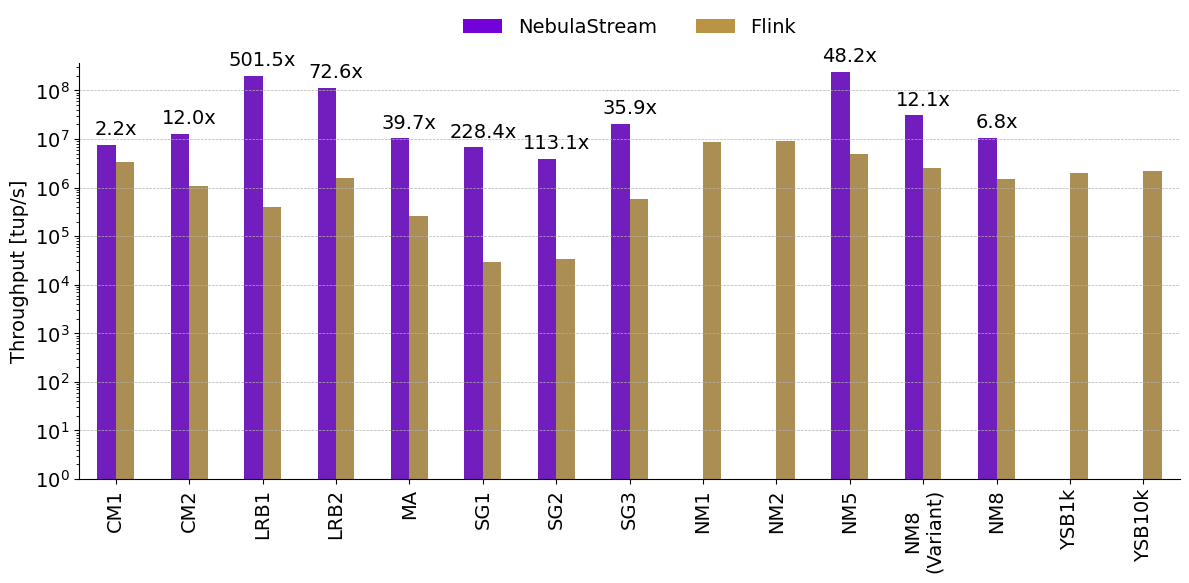

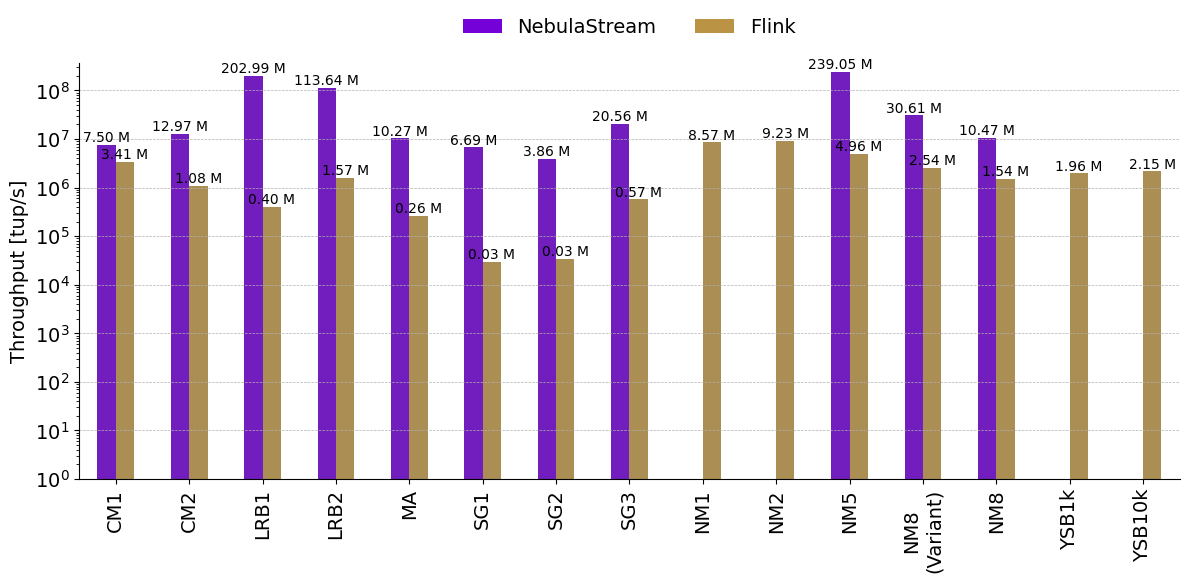

In [2]:
# Filter data for numberOfWorkerThreads == 24
noThreads = 24
cacheType = "SECOND_CHANCE"
df_filtered = df_concatenated[df_concatenated['parallelism'] == noThreads]
df_filtered = df_filtered[(df_filtered['system'] == 'Flink') | ((df_filtered['system'] == 'NebulaStream') & (df_filtered['sliceCacheType'] == cacheType))]
hue_order = ['NebulaStream', 'Flink']
x_order = ["CM1", "CM2", "LRB1", "LRB2", "MA", "SG1", "SG2", "SG3", "NM1", "NM2", "NM5", "NM8\n(Variant)", "NM8", "YSB1k", "YSB10k"]


#df_filtered = df_concatenated
# Create and save the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filtered, x='query_name', y='tuplesPerSecond', hue='system', palette=custom_palette, hue_order=hue_order, order=x_order, dodge=0.2, width=0.5)
#plt.title(f'Tuples per Second for numberOfWorkerThreads == {noThreads}')
plt.xticks(rotation=90, fontsize=14)
plt.xlabel("")
plt.ylabel("Throughput [tup/s]", fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.ylim(1)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the bars with values in millions per second
for pid, p in enumerate(ax.patches):
    pos_baseline = pid
    if pos_baseline >= (len(ax.patches) // 2 - 1):
        pos_baseline -= (len(ax.patches) // 2 - 1)
    baseline_height = ax.patches[pos_baseline].get_height()
    if pid >= (len(ax.patches) // 2 - 1) and p.get_height() > 0:
        speedup = baseline_height / p.get_height()
        print(pid, p.get_height(), pid//2, speedup, pos_baseline)
        ax.annotate(f'{speedup:.1f}x',
                    (p.get_x(), baseline_height * 1.5),
                    ha='center', va='center', xytext=(0, 5),
                    textcoords='offset points', fontsize=14, rotation=0)

plt.legend(title='', handles=legend_handles, fontsize=14, title_fontsize=14, labels=hue_order,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    frameon=False)        
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'system_comparison_listener.pdf'))
plt.show()
plt.close()

# Filter data for numberOfWorkerThreads == 24
noThreads = 24
df_filtered = df_concatenated[df_concatenated['parallelism'] == noThreads]
df_filtered = df_filtered[(df_filtered['system'] == 'Flink') | ((df_filtered['system'] == 'NebulaStream') & (df_filtered['sliceCacheType'] == cacheType))]


#df_filtered = df_concatenated
# Create and save the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filtered, x='query_name', y='tuplesPerSecond', hue='system', palette=custom_palette, hue_order=hue_order, order=x_order, dodge=0.2, width=0.5)
#plt.title(f'Tuples per Second for numberOfWorkerThreads == {noThreads}')
plt.xticks(rotation=90, fontsize=14)
plt.xlabel("")
plt.ylabel("Throughput [tup/s]", fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.ylim(1)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the bars with values in millions per second
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.2f} M',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='', handles=legend_handles, fontsize=14, title_fontsize=14, labels=hue_order,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    frameon=False)        
plt.tight_layout()
plt.show()
plt.close()

13 404768.0 6 287.31055411433437 0
14 1565504.0 7 8.194329122511158 1
15 258844.0 7 48.82208880719623 2
16 29312.0 8 185.02402120180034 3
17 34169.0 8 23.56476154234792 4
18 572606.0 9 39.043808237570424 5
19 8569443.0 9 46.6502342885489 6
20 9225203.0 10 225.36790839946667 7
21 4955659.0 10 51.160618083054544 8
22 2536393.0 11 12.582499726473817 9
23 1537475.0 11 7.112331197656302 10
24 1964771.0 12 76.84503815948526 11
25 2151093.0 12 66.5604327044378 12


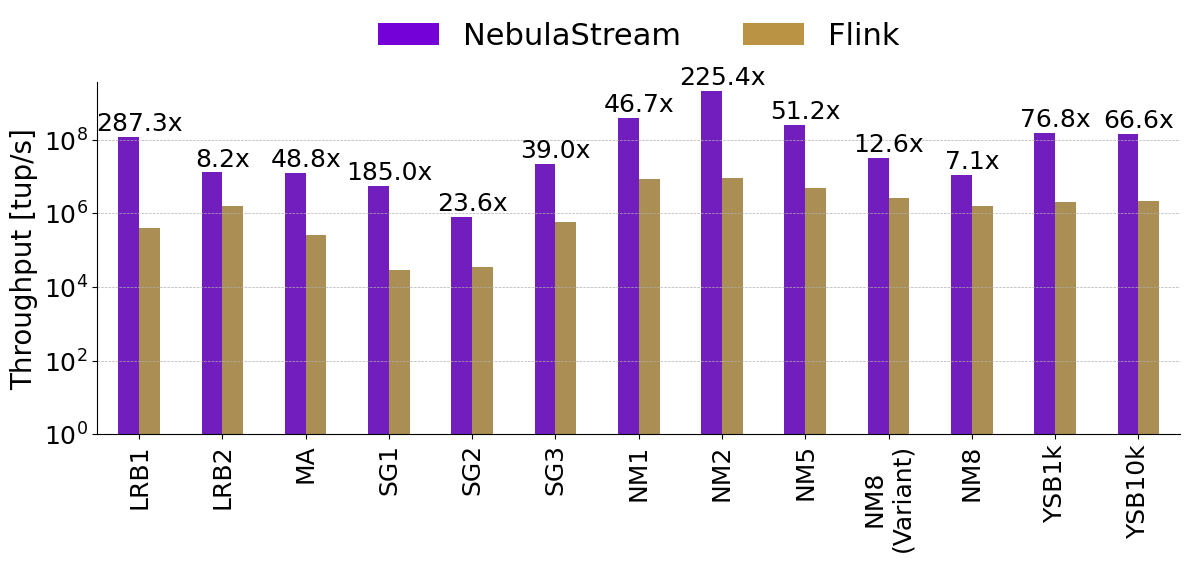

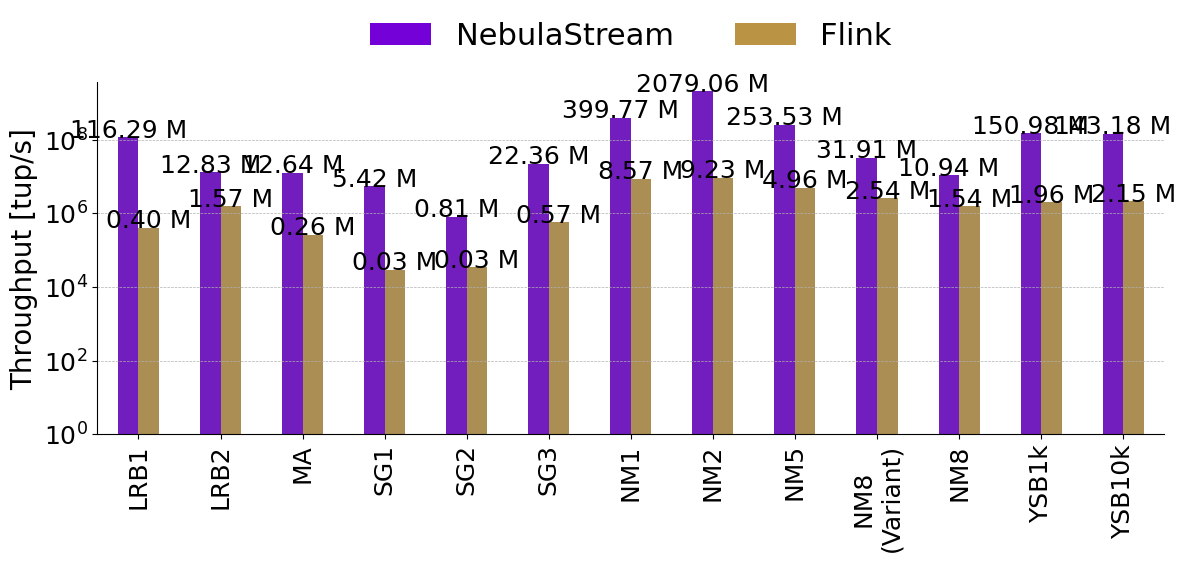

In [3]:
# Filter data for numberOfWorkerThreads == 24
noThreads = 24
cacheType = "SECOND_CHANCE"
df_filtered = df_concatenated[df_concatenated['parallelism'] == noThreads]
df_filtered = df_filtered[(df_filtered['system'] == 'Flink') | ((df_filtered['system'] == 'NebulaStream') & (df_filtered['sliceCacheType'] == cacheType))]
hue_order = ['NebulaStream', 'Flink']
#x_order = ["CM1", "CM2", "LRB1", "LRB2", "MA", "SG1", "SG2", "SG3", "NM1", "NM2", "NM5", "NM8\n(Variant)", "NM8", "YSB1k", "YSB10k"]
x_order = ["LRB1", "LRB2", "MA", "SG1", "SG2", "SG3", "NM1", "NM2", "NM5", "NM8\n(Variant)", "NM8", "YSB1k", "YSB10k"]

#df_filtered = df_concatenated
# Create and save the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filtered, x='query_name', y='tuplesPerSecond_e2e', hue='system', palette=custom_palette, hue_order=hue_order, order=x_order, dodge=0.2, width=0.5)
#plt.title(f'Tuples per Second for numberOfWorkerThreads == {noThreads}')
plt.xticks(rotation=90, fontsize=18)
plt.xlabel("")
plt.ylabel("Throughput [tup/s]", fontsize=20)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(1)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the bars with values in millions per second
for pid, p in enumerate(ax.patches):
    pos_baseline = pid
    if pos_baseline >= (len(ax.patches) // 2 - 1):
        pos_baseline -= (len(ax.patches) // 2 - 1)
    baseline_height = ax.patches[pos_baseline].get_height()
    if pid >= (len(ax.patches) // 2 - 1) and p.get_height() > 0:
        speedup = baseline_height / p.get_height()
        print(pid, p.get_height(), pid//2, speedup, pos_baseline)
        ax.annotate(f'{speedup:.1f}x',
                    (p.get_x(), baseline_height * 1.5),
                    ha='center', va='center', xytext=(0, 5), fontsize = 18,
                    textcoords='offset points', rotation=0)

plt.legend(title='', handles=legend_handles, fontsize=22, title_fontsize=22, labels=hue_order,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
    frameon=False)        
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'system_comparison_abs.pdf'))
plt.show()
plt.close()


#df_filtered = df_concatenated
# Create and save the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filtered, x='query_name', y='tuplesPerSecond_e2e', hue='system', palette=custom_palette, hue_order=hue_order, order=x_order, dodge=0.2, width=0.5)
#plt.title(f'Tuples per Second for numberOfWorkerThreads == {noThreads}')
plt.xticks(rotation=90, fontsize=18)
plt.xlabel("")
plt.ylabel("Throughput [tup/s]", fontsize=20)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(1)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the bars with values in millions per second
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.2f} M',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), fontsize = 18,
                textcoords='offset points')

plt.legend(title='', handles=legend_handles, fontsize=22, title_fontsize=22, labels=hue_order,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
    frameon=False)        
plt.tight_layout()
plt.show()
plt.close()

11 3861277.5952107846 5 30.118041373661576 0
12 2577739.662883784 6 4.976551823024831 1
13 3272343.045575799 6 3.861852067220003 2
14 3235969.773645041 7 1.6759810779561612 3
15 706601.0553514695 7 1.1395175977199474 4
16 3376966.6023788606 8 6.620355334261626 5
17 5415666.711591005 8 46.815025914762955 6
18 3655075.9627280254 9 8.731464011738472 7
19 3484630.114364668 9 3.138075218669326 8
20 10187234.737491664 10 14.820793508761883 9
21 10896789.347266914 10 13.139437342926927 10


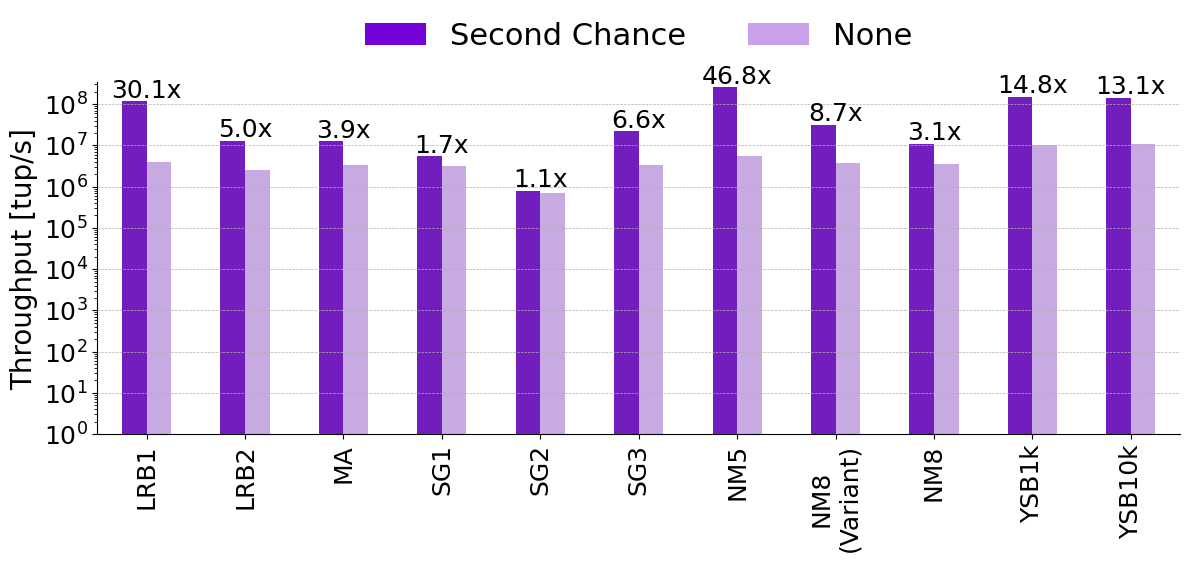

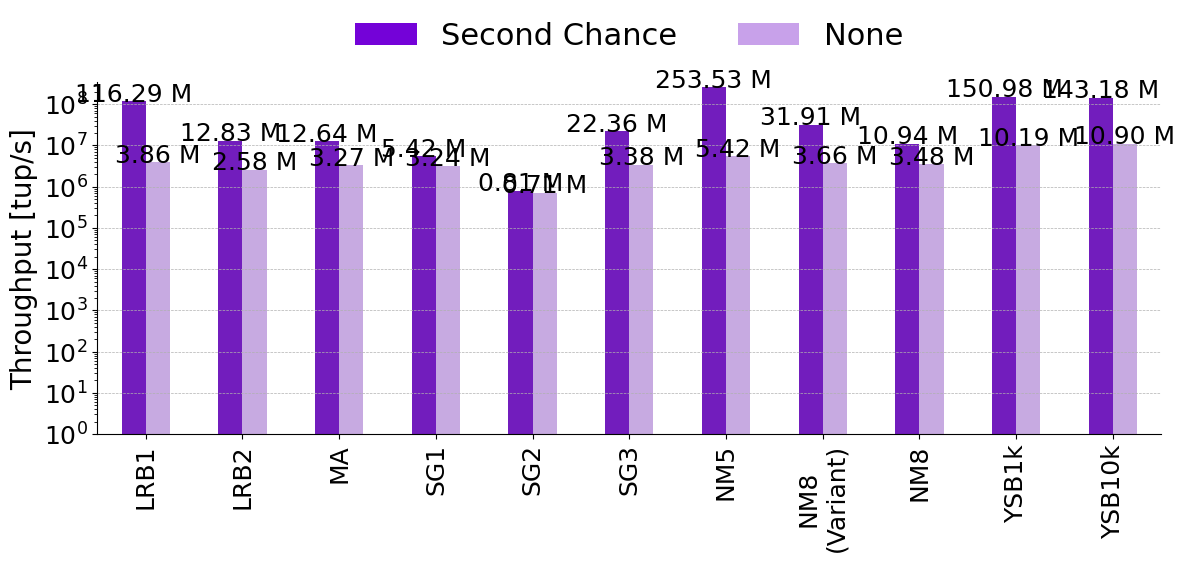

In [4]:
# Filter data for numberOfWorkerThreads == 24
custom_palette = ["#7402d8", "#c8a1ea"]
legend_handles = [
    Patch(facecolor=custom_palette[0], label='Second Chance'),
    Patch(facecolor=custom_palette[1], label='None')
]
legend_labels = ["Second Chance", "None"]

noThreads = 24
system = "NebulaStream"
df_filtered = df_concatenated[df_concatenated['system'] == system]
df_filtered = df_filtered[df_filtered['parallelism'] == noThreads]
hue_order = ['SECOND_CHANCE', 'NONE']
#x_order = ["CM1", "CM2", "LRB1", "LRB2", "MA", "SG1", "SG2", "SG3", "NM1", "NM2", "NM5", "NM8\n(Variant)", "NM8", "YSB1k", "YSB10k"]
x_order = ["LRB1", "LRB2", "MA", "SG1", "SG2", "SG3", "NM5", "NM8\n(Variant)", "NM8", "YSB1k", "YSB10k"]

#df_filtered = df_concatenated
# Create and save the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filtered, x='query_name', y='tuplesPerSecond_e2e', hue='sliceCacheType', palette=custom_palette, hue_order=hue_order, order=x_order, dodge=0.2, width=0.5)
#plt.title(f'Tuples per Second for numberOfWorkerThreads == {noThreads}')
plt.xticks(rotation=90, fontsize=18)
plt.xlabel("")
plt.ylabel("Throughput [tup/s]", fontsize=20)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(1)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the bars with values in millions per second
for pid, p in enumerate(ax.patches):
    pos_baseline = pid
    if pos_baseline >= (len(ax.patches) // 2 - 1):
        pos_baseline -= (len(ax.patches) // 2 - 1)
    baseline_height = ax.patches[pos_baseline].get_height()
    if pid >= (len(ax.patches) // 2 - 1) and p.get_height() > 0:
        speedup = baseline_height / p.get_height()
        print(pid, p.get_height(), pid//2, speedup, pos_baseline)
        ax.annotate(f'{speedup:.1f}x',
                    (p.get_x(), baseline_height * 1.25),
                    ha='center', va='center', xytext=(0, 5), fontsize = 18,
                    textcoords='offset points', rotation=0)

plt.legend(title='', handles=legend_handles, fontsize=22, title_fontsize=22, labels=legend_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
    frameon=False)        
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'system_comparison_cache_with_and_without_abs.pdf'))
plt.show()
plt.close()

# Filter data for numberOfWorkerThreads == 24
noThreads = 24
system = "NebulaStream"
df_filtered = df_concatenated[df_concatenated['system'] == system]
df_filtered = df_filtered[df_filtered['parallelism'] == noThreads]
hue_order = ['SECOND_CHANCE', 'NONE']

#df_filtered = df_concatenated
# Create and save the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filtered, x='query_name', y='tuplesPerSecond_e2e', hue='sliceCacheType', palette=custom_palette, hue_order=hue_order, order=x_order, dodge=0.2, width=0.5)
#plt.title(f'Tuples per Second for numberOfWorkerThreads == {noThreads}')
plt.xticks(rotation=90, fontsize=18)
plt.xlabel("")
plt.ylabel("Throughput [tup/s]", fontsize=20)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(1)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the bars with values in millions per second
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.2f} M',
                (p.get_x() + p.get_width() / 2., p.get_height()), fontsize = 18,
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='', handles=legend_handles, fontsize=22, title_fontsize=22, labels=legend_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
    frameon=False)        
plt.tight_layout()
plt.show()
plt.close()

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


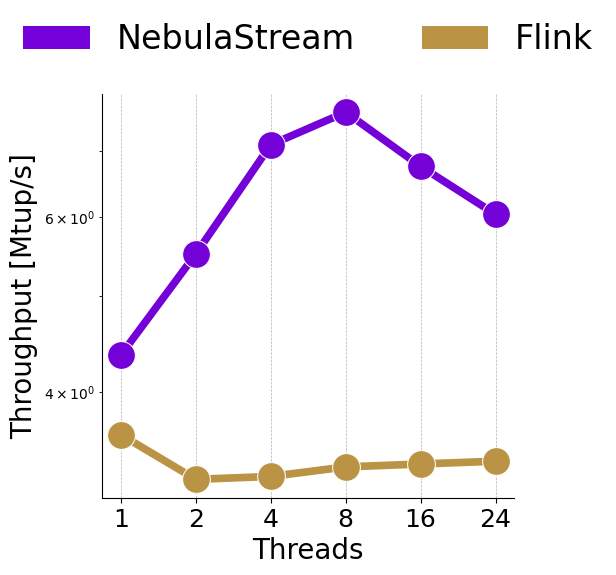

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


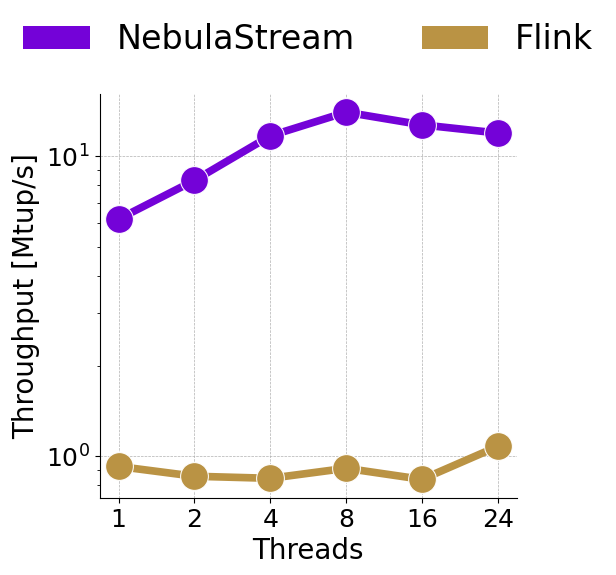

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


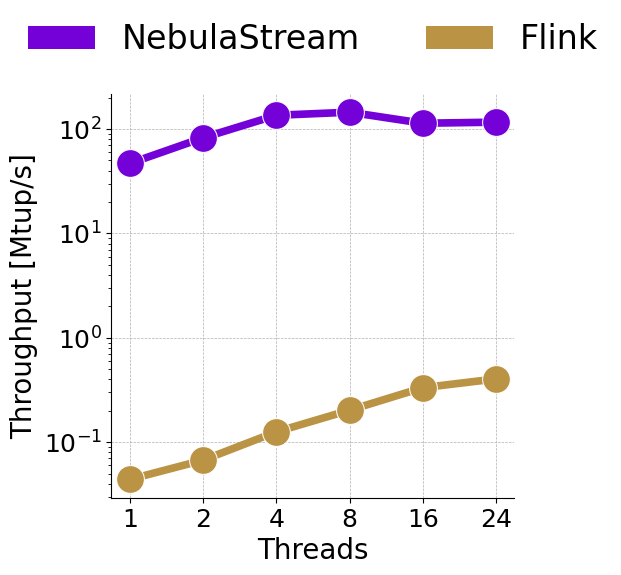

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


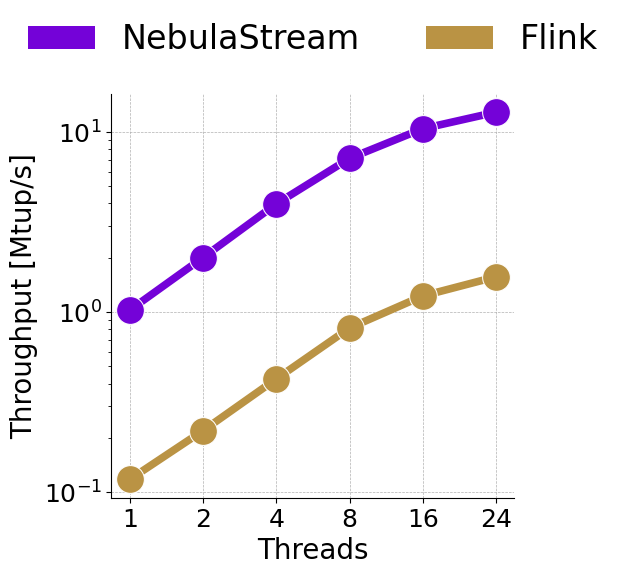

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


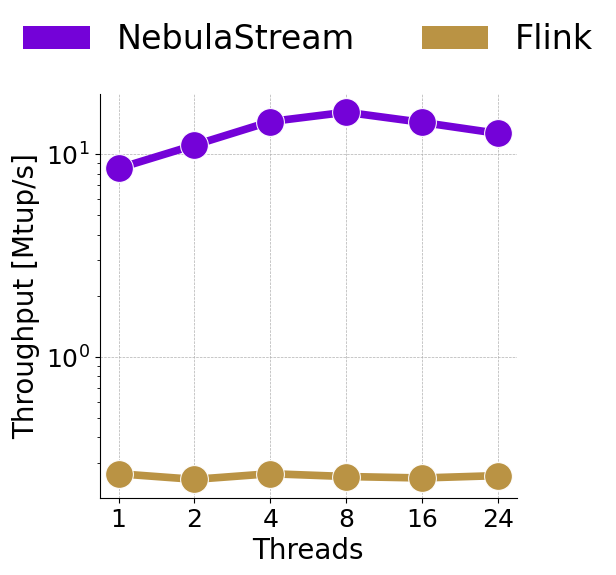

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


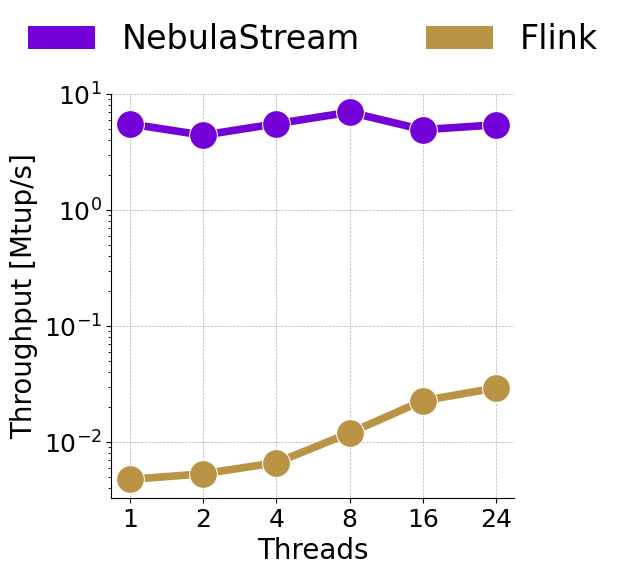

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


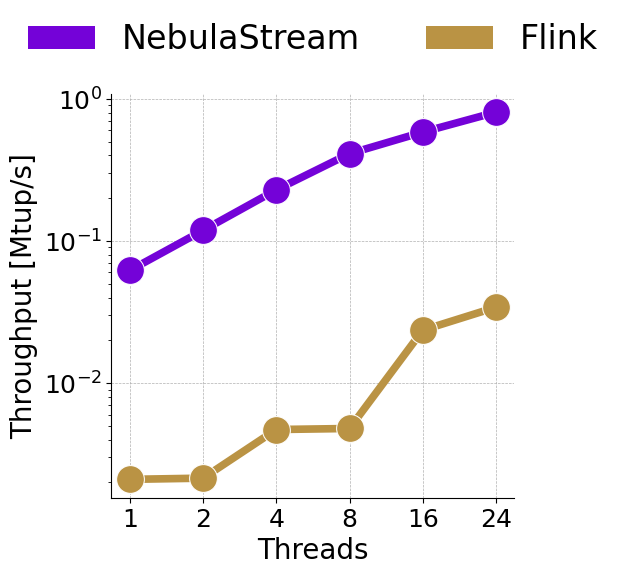

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


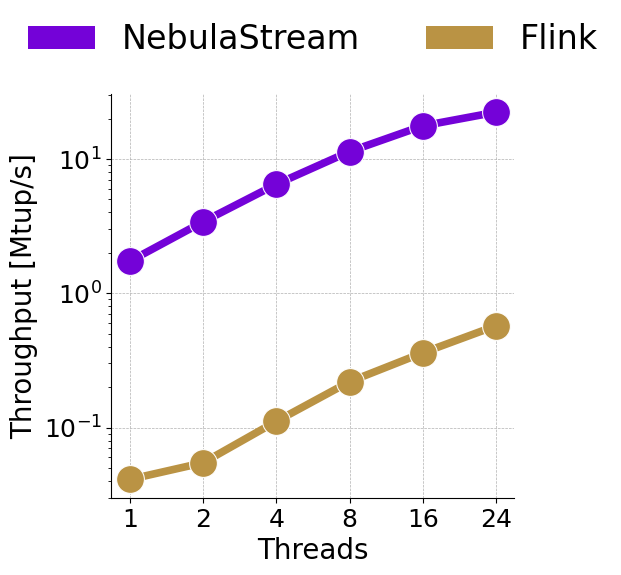

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


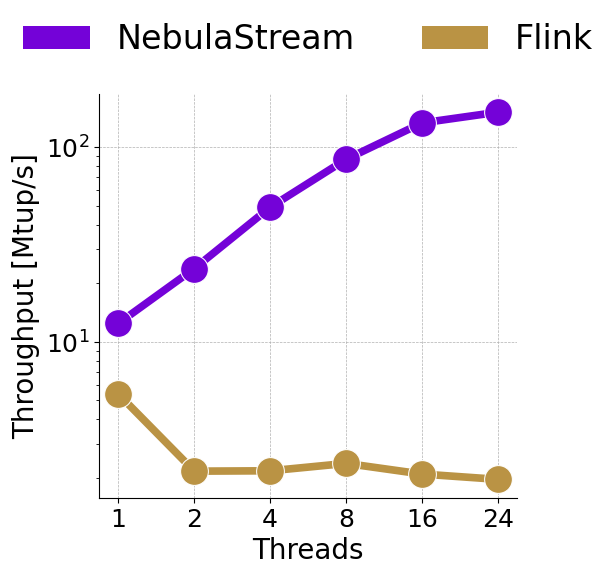

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


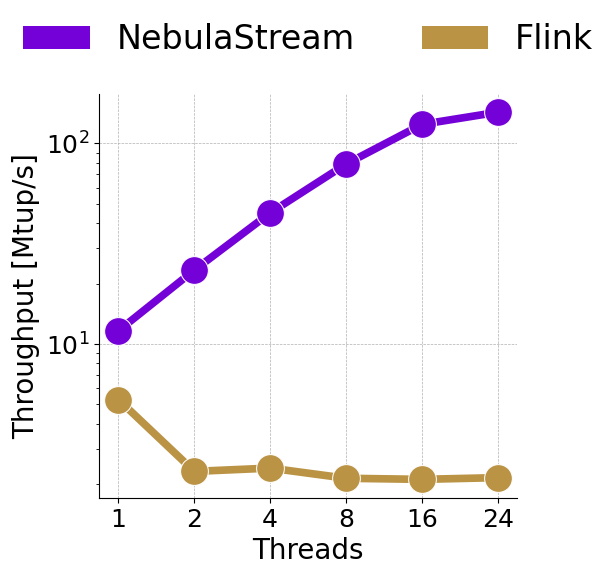

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


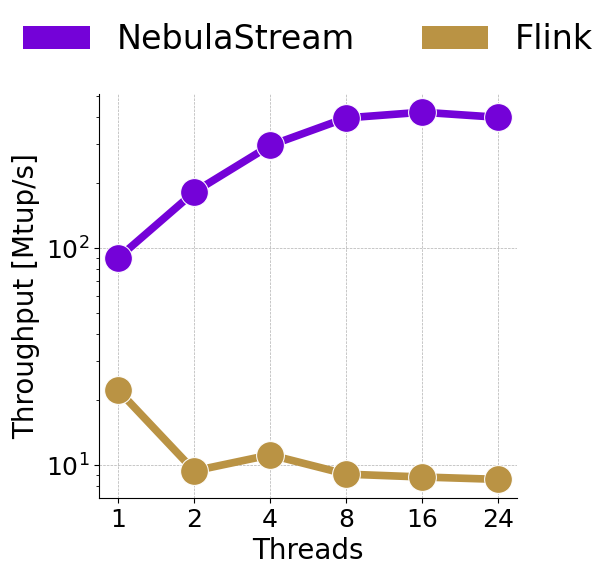

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


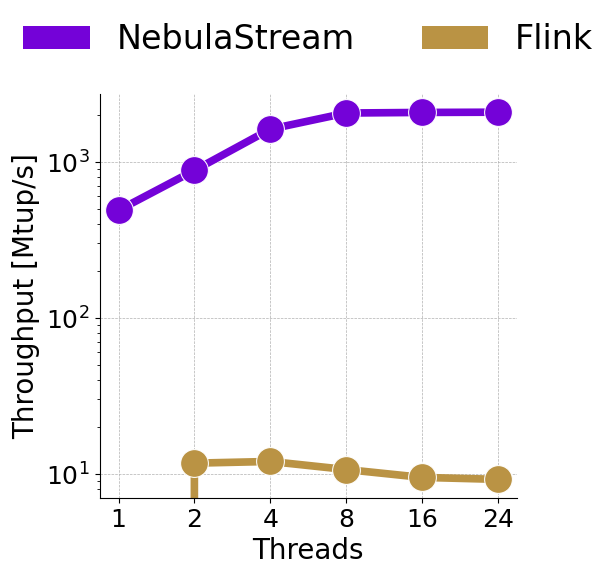

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


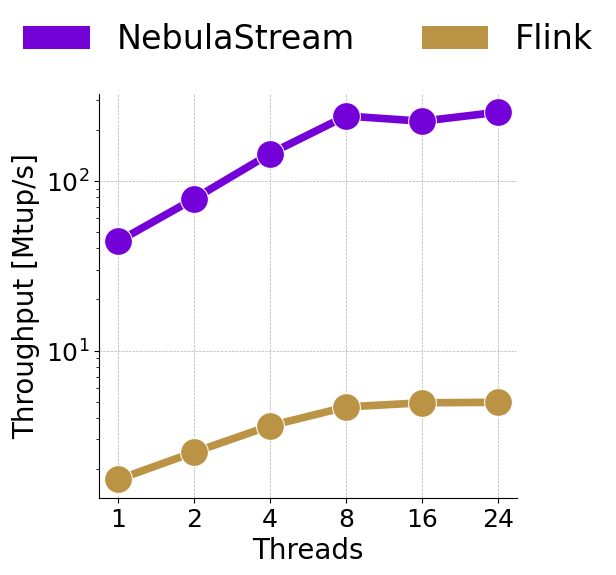

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


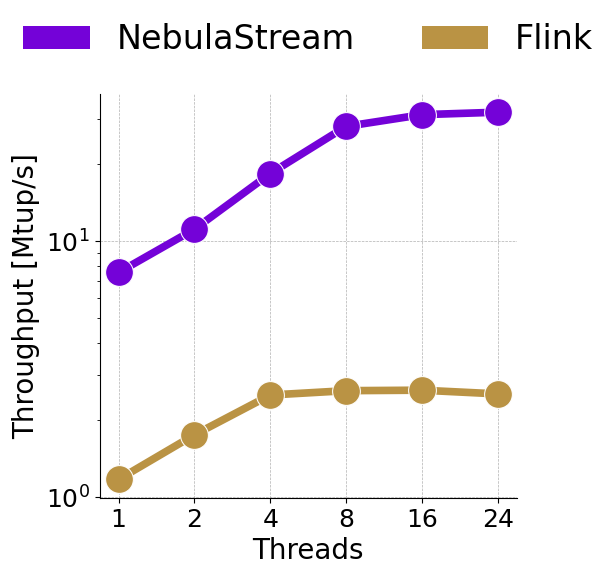

/tmp/ipykernel_45518/267920599.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_45518/267920599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


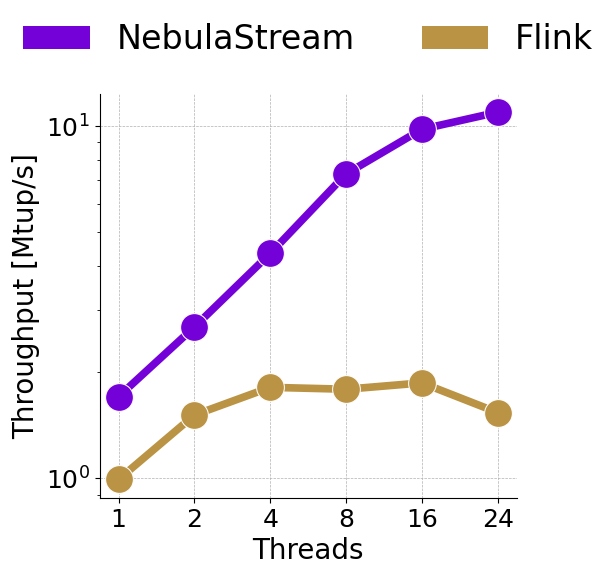

In [5]:
# Create and save line plots for each query_name
hue_order = ['NebulaStream', 'Flink']
custom_palette = ["#7402d8", "#ba9344"]
legend_handles = [
    Patch(facecolor=custom_palette[0], label='NebulaStream'),
    Patch(facecolor=custom_palette[1], label='Flink')
]
queries = df_concatenated['query_name'].unique()
cacheType = "SECOND_CHANCE"
df_filtered = df_concatenated[(df_concatenated['system'] == 'Flink') | ((df_concatenated['system'] == 'NebulaStream') & (df_concatenated['sliceCacheType'] == cacheType))]

for query in queries:
    df_query = df_filtered[df_filtered['query_name'] == query]
    df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
    df_query['parallelism_str'] = df_query['parallelism'].astype(str)
    plt.figure(figsize=(6, 6))
    ax = sns.lineplot(data=df_query, x='parallelism_str', y='millionTuplesPerSecond', hue='system', marker='o', markersize=20, linewidth=5.5, palette=custom_palette, hue_order=hue_order)
    
    plt.legend(title='', handles=legend_handles, fontsize=24, title_fontsize=14, labels=hue_order,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.25),
        ncol=2,
        frameon=False)
    plt.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #plt.title(f'Tuples per Second for {query}')
    plt.xticks(rotation=0, fontsize=18)
    plt.xlabel("Threads", fontsize=20)
    plt.ylabel("Throughput [Mtup/s]", fontsize=20)
    plt.yscale('log')
    plt.yticks(fontsize=18)
    #plt.ylim(1)
    plt.tight_layout()
    query_name = str(query).replace("NM8\n(Variant)", "NM8_Variant")
    filename = f"{query_name}_parallelism_tuplesPerSecond.pdf"
    plt.savefig(os.path.join(output_dir, filename))
    plt.show()
    plt.close()